In [14]:
import re
import json
import pandas as pd
import matplotlib
matplotlib.use('nbAgg')
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

# Set iPython to display visualization inline
%matplotlib inline

In [5]:
tweets_data_path = '../data/Twitter_Zika_FullDataSet.txt'

tweets_data_full = []
tweets_file = open(tweets_data_path, "r")


for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data_full.append(tweet)
    except:
        pass 

print("This document contains %d tweets.\n" %(len(tweets_data_full)))


This document contains 76037 tweets.



In [6]:
s = json.dumps(tweets_data_full, indent=2)
print(s[:30])

[
  {
    "in_reply_to_status_


In [7]:
# Write out FULL Twitter JSON File:
with open('../data/Twitter_Zika_FullData.json', 'w') as twitterJSONFile_out:
    twitterJSONFile_out.write(s)

In [3]:
# Read in FULL Twitter JSON File:
with open('../data/Twitter_Zika_FullData.json', 'r') as twitterJSONFile_in:
    tweets_data_full = json.load(twitterJSONFile_in)

print(type(tweets_data_full))


<class 'list'>


In [38]:
# list comprehension to create a data frame of important information

user_ID         = [(T['user']['id'] if 'user' in T else None) for T in tweets_data_full]
user_userName   = [(T['user']['screen_name'] if 'user' in T else None) for T in tweets_data_full]
user_screenName = [(T['user']['name'] if 'user' in T else None) for T in tweets_data_full]
tweet_location  = [(T['place']['full_name'] if 'place' in T and T['place'] is not None else None) for T in tweets_data_full]
tweet_country   = [(T['place']['country_code'] if 'country_code' in T else None) for T in tweets_data_full]
geo_lats        = [(T['geo']['coordinates'][0] if 'geo' in T and T['geo'] is not None else None) for T in tweets_data_full]
geo_lons        = [(T['geo']['coordinates'][1] if 'geo' in T and T['geo'] is not None else None) for T in tweets_data_full]
tweet_time      = [(T['created_at'] if 'created_at' in T else None) for T in tweets_data_full]
tweet_lang      = [(T['lang'] if 'lang' in T and T['lang']!='und' else None) for T in tweets_data_full]
text            = [(T['text'] if 'text' in T else None) for T in tweets_data_full]
in_reply_to_screen_name = [(T['in_reply_to_screen_name'] if 'in_reply_to_screen_name' in T else None) for T in tweets_data_full]


In [58]:
tweet_location_names  = [x for x in tweet_location if x is not None]
print(len(tweet_location_names))
tweet_location_unique = set(tweet_location_names)
print(len(tweet_location_unique))

1264
684


In [68]:
tweet_lat_lon_dict = {}

In [74]:
# Turning the place name into a geo (lat,lon) location
geolocator = Nominatim()

for i, placeName in enumerate(tweet_location_unique):
    if placeName not in tweet_lat_lon_dict:
        try:
            placeGeo  = geolocator.geocode(placeName)
        except Exception as E:
            print("exception happened", type(E), E)

        if i % 20 == 0:
            print(i)
        if placeGeo is not None:
            tweet_lat_lon_dict[placeName] = (placeGeo.latitude, placeGeo.longitude)
        else:
            tweet_lat_lon_dict[placeName] = (None, None)
    

In [81]:
print(len(tweet_lat_lon_dict))
bad_place_names = [k for k,v in tweet_lat_lon_dict.items() if v == (None,None)]
print(len(bad_place_names))
print("\n".join(bad_place_names))


684
8
Senna Saint Denis, Ile-de-France
Vododara, India
Piltenes pagasts, Latvija
Tanjong Kling, Melaka
Twentynine Palms Base, CA
KwaLenza, South Africa
Tampin Tengah, Negeri Sembilan
anto Domingo de Guzmán, Dominican Republic


In [84]:
# Write out the dictionary of place names and corresponding latitutes & longitudes to a JSON file
with open('../data/Twitter_Zika_PlaceName_Geo_info.json', 'w') as twitterGeo_JSONFile:
    json.dump(tweet_lat_lon_dict, twitterGeo_JSONFile, indent=2)

In [5]:
# read in the dictionary of place names and corresponding latitutes & longitudes - JSON file 
with open('../data/Twitter_Zika_PlaceName_Geo_info.json', 'r') as tweet_Geo_JSON_File:
    tweet_GeoDict = json.load(tweet_Geo_JSON_File)

print(type(tweet_GeoDict))


<class 'dict'>


In [105]:
list(tweet_location_unique)[0]
la,lo = tweet_GeoDict['Johnson Village, CO']
print(la)


38.8108291


In [6]:
# Create two lists: tweet_loc_lats & tweet_loc_lons - each the length of the full tweet_location list

tweet_loc_lats = []
tweet_loc_lons = []


In [7]:
# Populate the lists with values
for placeName in tweet_location:
    if placeName is not None:
        tmplat,tmplon = tweet_GeoDict[placeName]
        tweet_loc_lats.append(tmplat)
        tweet_loc_lons.append(tmplon)
    else:
        tweet_loc_lats.append(None)
        tweet_loc_lons.append(None)        


In [39]:
# Put all the lists into a Data Frame: 

tweets_full_dataframe = pd.DataFrame({'userID':user_ID, 'userName':user_userName, 'userScreenName':user_screenName,
                                      'tweet_location':tweet_location,'user_lats':tweet_loc_lats,'user_lons':tweet_loc_lons,
                                      'tweet_country':tweet_country, 'geo_lats':geo_lats, 'geo_lons':geo_lons,
                                      'tweet_time':tweet_time, 'tweet_lang':tweet_lang, 'text':text,
                                      'reply_to_ScreenName':in_reply_to_screen_name})


In [40]:
tweets_full_dataframe.tail(5)

,geo_lats,geo_lons,reply_to_ScreenName,text,tweet_country,tweet_lang,tweet_location,tweet_time,userID,userName,userScreenName,user_lats,user_lons
76032,NaN,NaN,None,Researchers will conduct Zika #study on U.S. O...,None,en,None,Thu Jul 07 13:40:15 +0000 2016,6.908175e+07,BaruchProForum,BaruchProForum,NaN,NaN
76033,NaN,NaN,None,RT @PublicHealth: Two experimental Zika vaccin...,None,en,None,Thu Jul 07 13:40:18 +0000 2016,7.468381e+17,AnnaNeal25,Anna Neal,NaN,NaN
76034,NaN,NaN,None,UPenn researchers develop $2 Zika virus test w...,None,en,None,Thu Jul 07 13:40:19 +0000 2016,3.936979e+08,Build3dprinter,B3dge,NaN,NaN
76035,NaN,NaN,None,Puerto Rico urged to use aerial spraying to co...,None,en,None,Thu Jul 07 13:40:19 +0000 2016,2.983548e+09,williamenafox,williamenafox,NaN,NaN
76036,NaN,NaN,None,"#CSSContigo Dra. Gladys Guerrero de la CSS, br...",None,es,None,Thu Jul 07 13:40:22 +0000 2016,2.530538e+08,CSSPanama,CSS Panamá,NaN,NaN


In [41]:
# Finding unique values

uniqueID       = tweets_full_dataframe.userID.unique()
uniqueLocation = tweets_full_dataframe.tweet_location.unique()
uniqueLanguage = tweets_full_dataframe.tweet_lang.unique()

print("There are %d tweets in this dataframe, but only %d unique users." %(len(tweets_full_dataframe), len(uniqueID)))
print("Of the %d unique users, there are %d different languages represented." %(len(uniqueID), len(uniqueLanguage)))
print("Of the %d unique users, %d listed a self-reported location." %(len(uniqueID), len(uniqueLocation)))

There are 76037 tweets in this dataframe, but only 51061 unique users.
Of the 51061 unique users, there are 42 different languages represented.
Of the 51061 unique users, 685 listed a self-reported location.


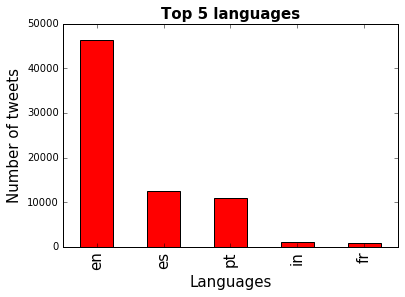

In [42]:
# Plotting the top 5 languages

tweets_by_lang = tweets_full_dataframe['tweet_lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')


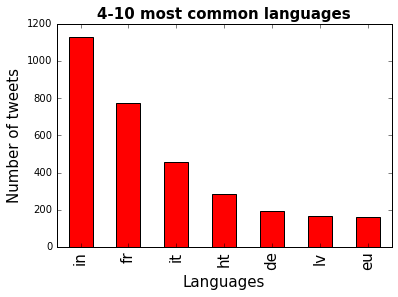

In [43]:
# Plotting the languages most common, after the 3 top

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('4-10 most common languages', fontsize=15, fontweight='bold')
tweets_by_lang[3:10].plot(ax=ax, kind='bar', color='red')


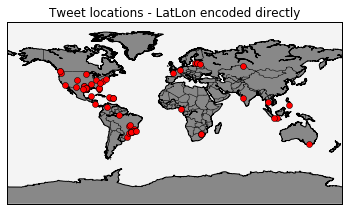

In [19]:
# Map out the tweet location by direct Lat Lon

# Use the Gall–Peters projection
map = Basemap(projection='gall', 
              resolution = 'l', 
              area_thresh = 100000.0,
              # Centered at 0,0 (i.e null island)
              lat_0=0, lon_0=0)

# Draw the coastlines on the map
map.drawcoastlines()

# Draw country borders on the map
map.drawcountries()

# Fill the land with grey
map.fillcontinents(color = '#888888')

# Draw the map boundaries
map.drawmapboundary(fill_color='#f4f4f4')

# Define longitude and latitude points
x,y = map(tweets_full_dataframe['geo_lons'].values, tweets_full_dataframe['geo_lats'].values)

# Plot using round, red markers, size 6
map.plot(x, y, 'ro', markersize=6)

plt.title('Tweet locations - LatLon encoded directly')

# Show the map
plt.show()

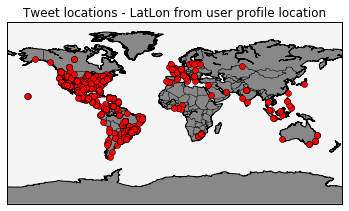

In [20]:
# Map out the tweet location by direct Lat Lon

# Use the Gall–Peters projection
map = Basemap(projection='gall', 
              resolution = 'l', 
              area_thresh = 100000.0,
              # Centered at 0,0 (i.e null island)
              lat_0=0, lon_0=0)

# Draw the coastlines on the map
map.drawcoastlines()

# Draw country borders on the map
map.drawcountries()

# Fill the land with grey
map.fillcontinents(color = '#888888')

# Draw the map boundaries
map.drawmapboundary(fill_color='#f4f4f4')

# Define longitude and latitude points
x,y = map(tweets_full_dataframe['user_lons'].values, tweets_full_dataframe['user_lats'].values)

# Plot using round, red markers, size 6
map.plot(x, y, 'ro', markersize=6)

plt.title('Tweet locations - LatLon from user profile location')

# Show the map
plt.show()